# End-to-end Machine Learning project using Scikit-learn
Based on https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb

## 1. Look at the big picture.
See slides.

## 2. Get the data

In [1]:
# Import packages
import pandas as pd
import numpy as np

Let's start by loading the data. You might have to change the path to the file depending on where it is saved in your computer.

In [2]:
# Load data
data = pd.read_csv('HousingData.csv')

Let's explore the dataset. Starting by looking at the first five observations (data points). This allows us to see the variables in the dataset and it's a good preview of the type of data (e.g. numerical, categorical) for each variable. "The 25%, 50%, and 75% rows show the corresponding percentiles : a percentile indicates the value below which a given percentage of observations in a group of observations fall. For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37.
Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow ".

In [3]:
# Explore data variables
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Next we are going to check for missing values and for actual data type using the info method.

In [4]:
# Check for missing data and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As can be seen from the output of info, most variables do not contain missing data but total_bedrooms do. This will be addressed later in the project. Now we are going to summarise the data in terms of its summary statistics. What are the mean, standard variation etc. for each variable. This gives us a sense of how the data is distributed and the existance of outliers and differences in scale between variables.

In [5]:
# Describe is a good method to use to give you an idea of the distribution of each variable 
# and why normalizing the data is a good idea.
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another way of getting a quick look at the entire dataset before starting a more formal exploratory analysis of the data is to use the following plotting functions. What can you tell from the histograms for each variable? "A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow ". Check here for more information on what a histogram is: https://www.mathsisfun.com/data/histograms.html 

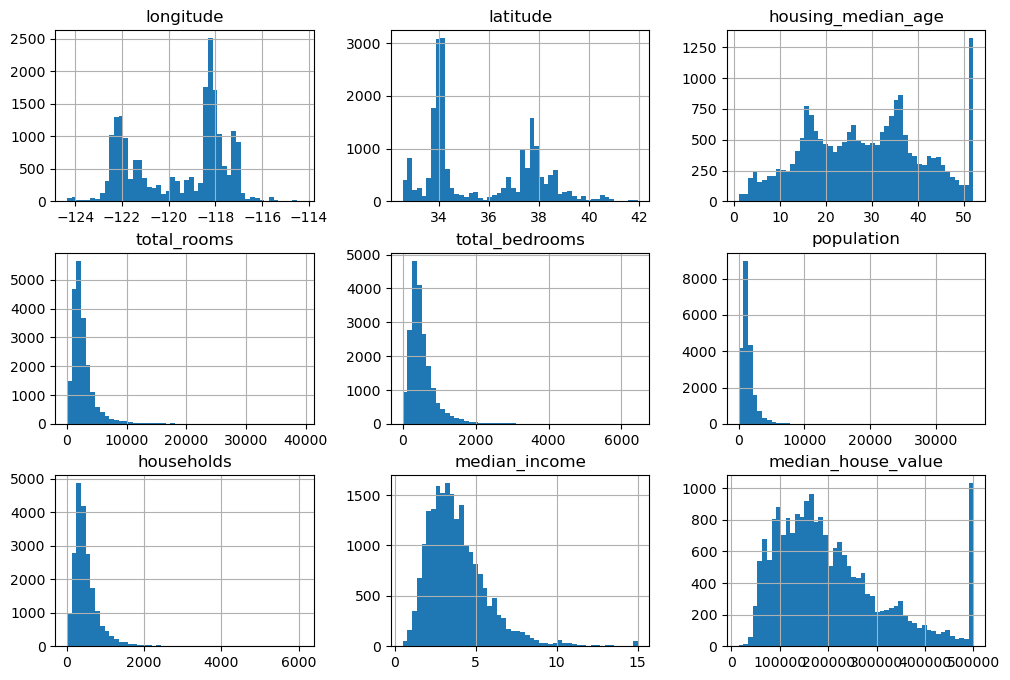

In [6]:
# Let's atart by exploring the data using matplotlib histograms
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(12, 8))
plt.show()

Another very useful plot to get a first look at the data is the pairplot from seaborn. In this case the are too many variables and the plot becomes slow, so it's good to select only the numerical variables of interest, and colour them using a categorical variable, in our case 'Ocean Proximity'.

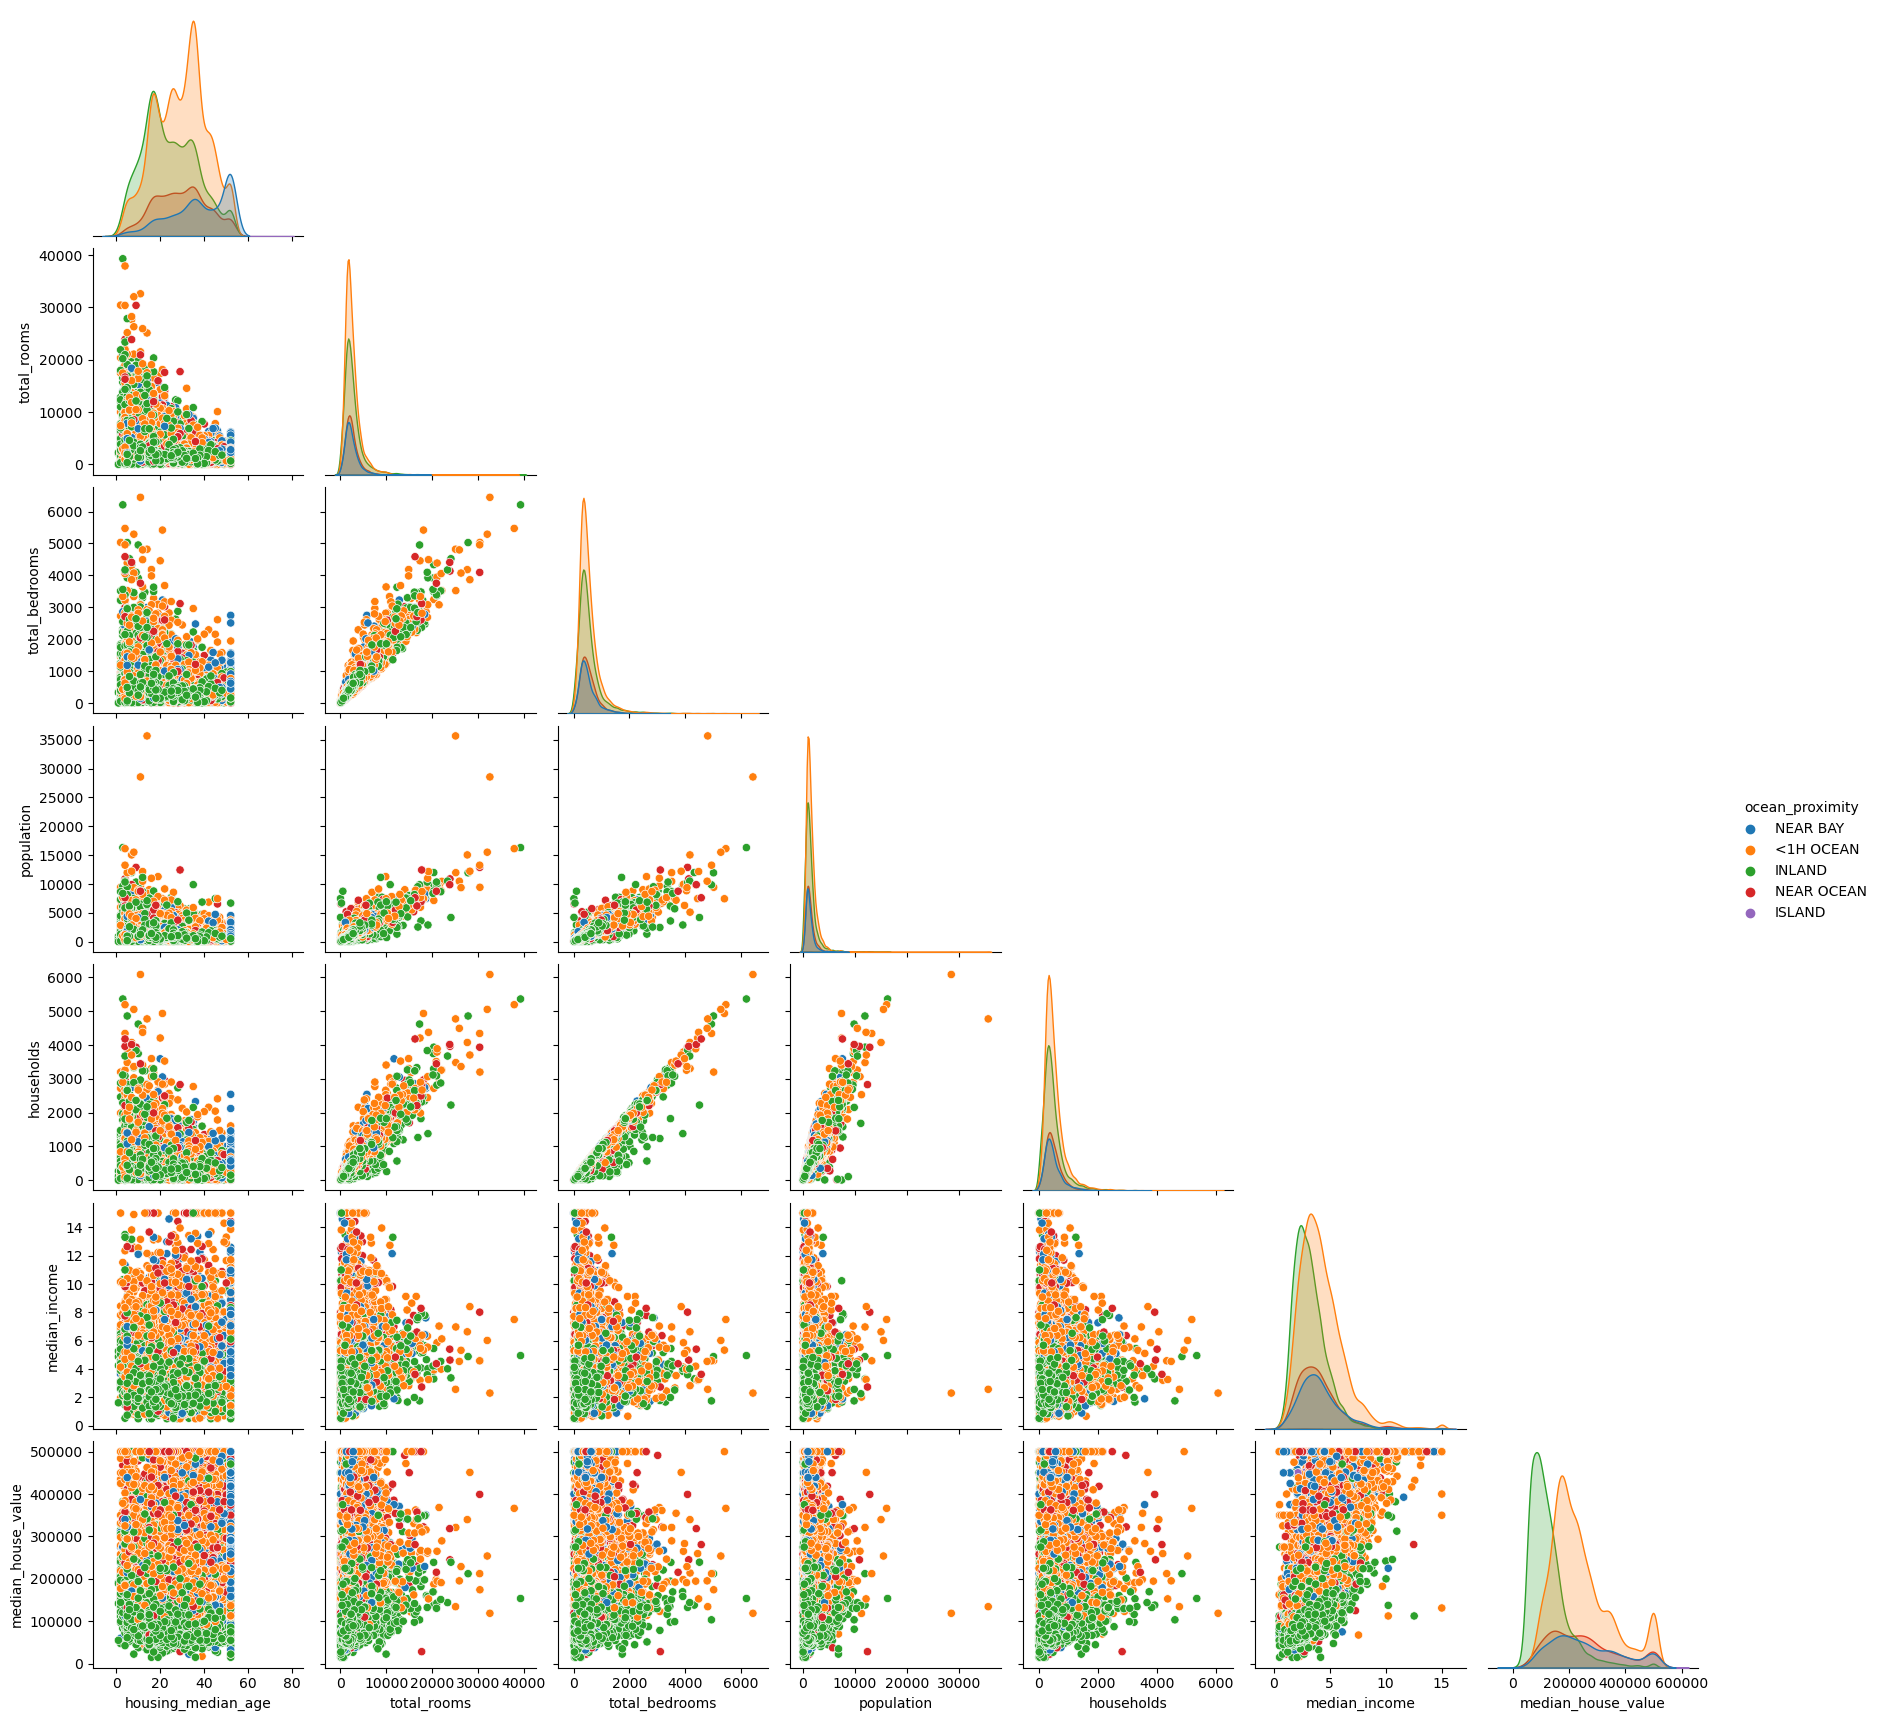

In [7]:
# Load seaborn and use pairplot to visualize the data
import seaborn as sns
sns.pairplot(data[["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value", "ocean_proximity"]], corner=True, hue="ocean_proximity")


The variable 'Ocean Proximity' is categorical. To understand how many categories there are in the dataset and how many observations per category, we can use the following code:

In [8]:
# There are 5 categories in ocean proximity and they highly imbalanced. 
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Can you think of other plots or other ways to look at the data before a more formal exploration?

What have we learned from the data so far?

Do you think it's possible to predict median house price from the variables in the dataset?

Is there something we need to pay attention to or be careful with going forwards in our analysis?

### Create test set
Before we continue it's important to create our test dataset, where we are going to evaluate our machine learning model on. The test set cannot be used to influence our decisions on the modelling process and therefore needs to be set aside and only used in the evaluation phase of the project. The easiest way to create a test set is to use scikit learn functionality, for example:

In [9]:
# Import split function from scikit learn
from sklearn.model_selection import train_test_split

# The simplest slipt (the random state fixes how the data is randomly selected, so that it's always the same split everytime we run this cell)
dtrain, dtest = train_test_split(data, test_size=0.2, random_state=0)

Before we continue, we need to ask some questions of the test set:

How well does it represent the entire dataset?

Are we selection from one category more/less than we should?

How good is it at representing the population so that we can trust the evaluation results?

For this particular dataset it might be better to stratify the train/test split by median income. This is because the median income variable is a good predictor for median house precise and knowledge of the data has shown that a simple random split of the data creates a test set that doesn't represent the distribution of median incomes as well as a stratified dataset. So the following lines of code use a function of scikit learn for splitting the data into train and test sets that respect how the median income variable is distributed.

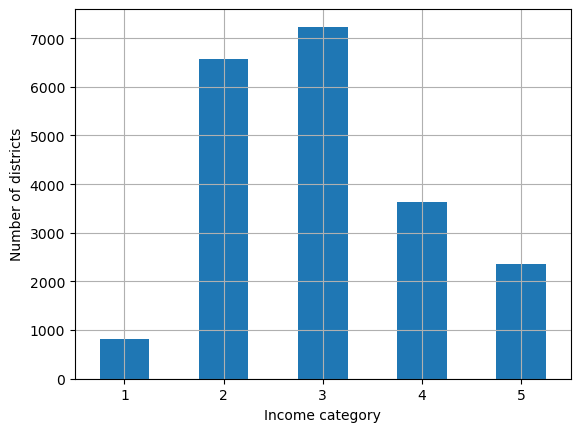

In [10]:
# First the median income variable is categorised into 5 different groups of income
data["income_cat"] = pd.cut(data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

data["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [11]:
# Now the data can be split respecting these categories
from sklearn.model_selection import StratifiedShuffleSplit

# Produce indices for training and test observations
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_dtrain = data.iloc[train_index]
    strat_dtest = data.iloc[test_index]

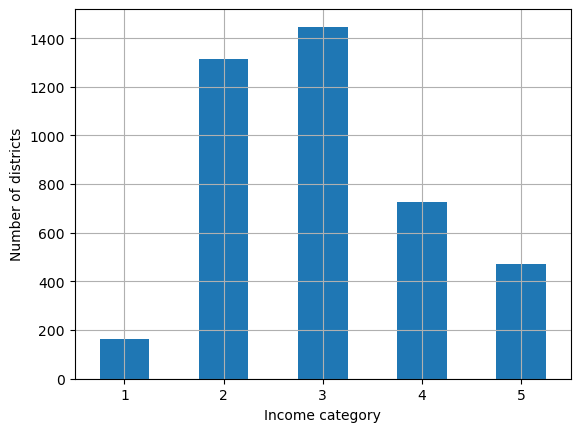

In [12]:
# Check that stratification worked correctly
strat_dtest["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [13]:
# Now delete the extra column for income category that is not needed for the Machine Learning analysis
for set_ in (strat_dtrain, strat_dtest):
    set_.drop("income_cat", axis=1, inplace=True)

C:\Users\md82\AppData\Local\Temp\ipykernel_15756\3151724678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
C:\Users\md82\AppData\Local\Temp\ipykernel_15756\3151724678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


## Discover and visualize the data to gain insights